## Introduction to Matplotlib

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

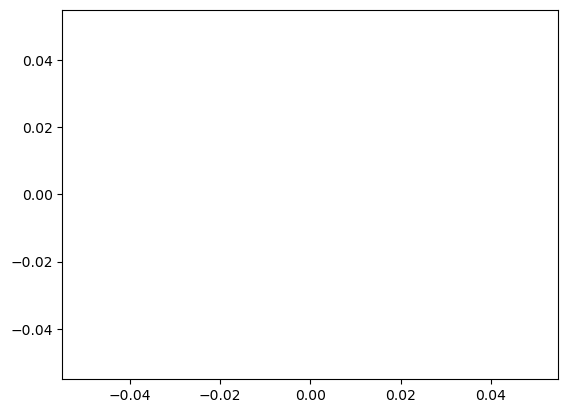

In [5]:
plt.plot();

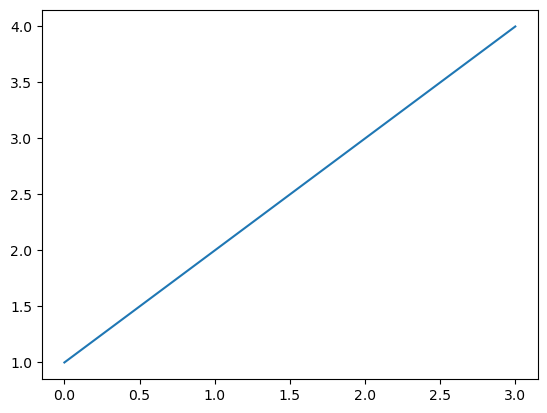

In [6]:
plt.plot([1, 2, 3, 4])

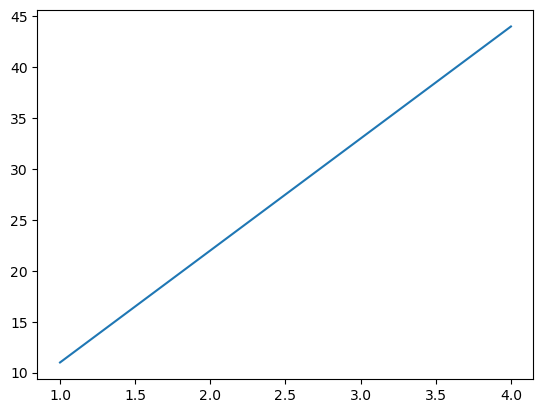

In [7]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

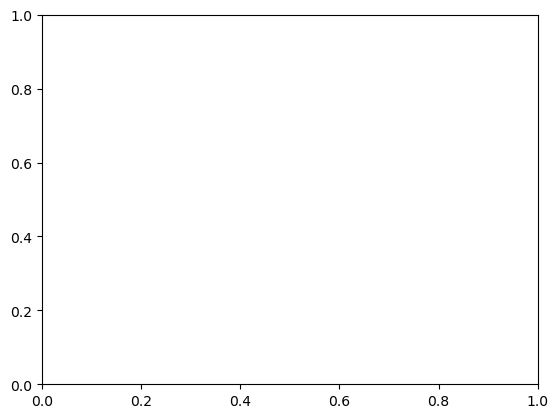

In [8]:
# 1st method
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

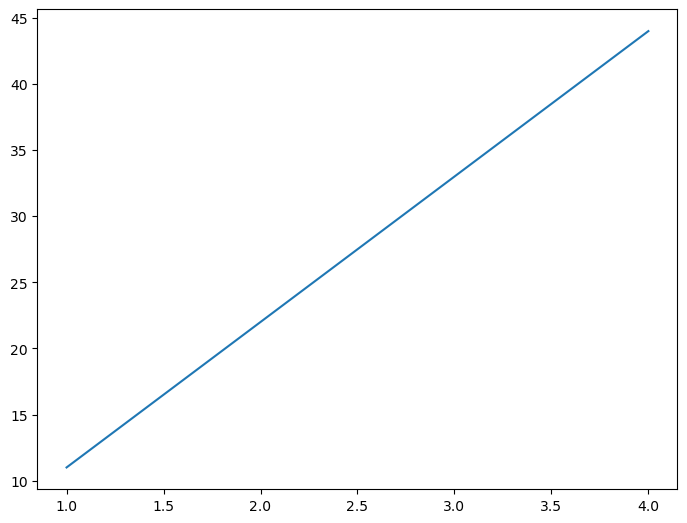

In [12]:
#2nd method
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x,y)
plt.show()

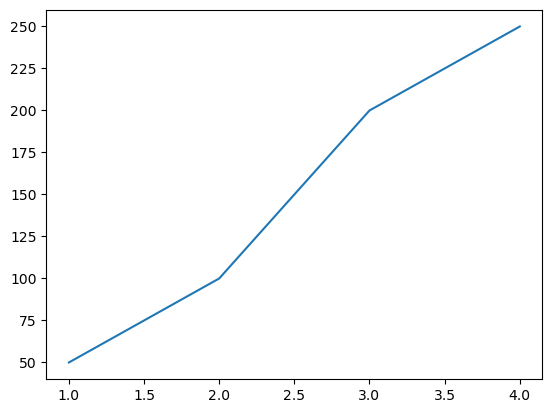

In [14]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,[50, 100, 200, 250]) #add some data

## Matplotlib example workflow

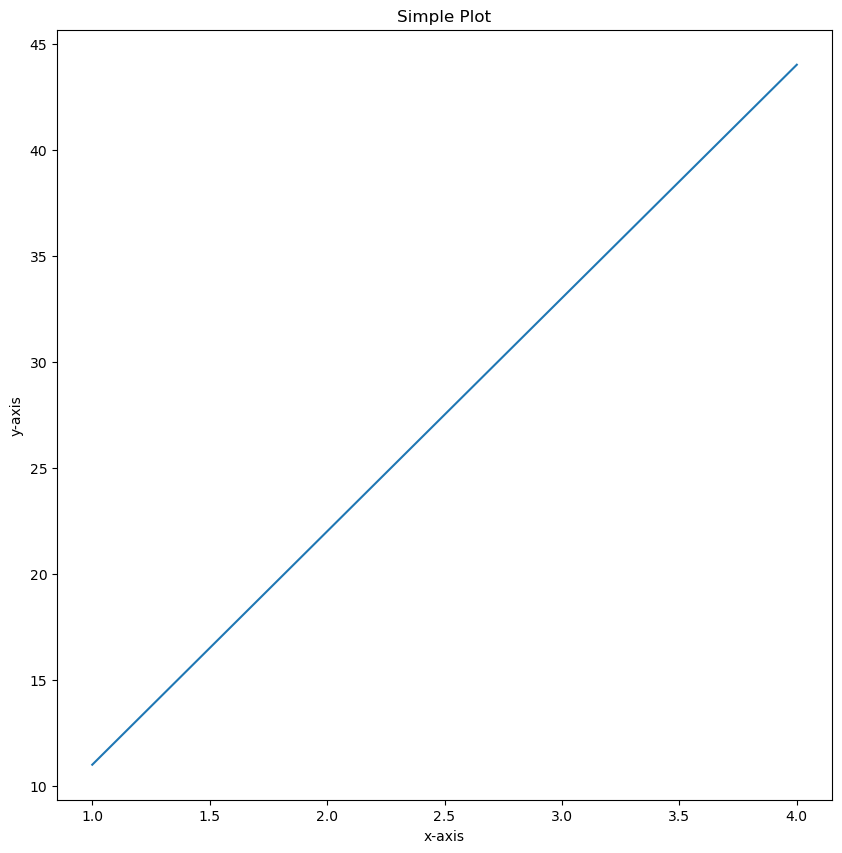

In [27]:
# 0.Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2 Setup plot
fig, ax = plt.subplots(figsize=(10,10)) #figsize=(width, heigth)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save & show
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [28]:
import numpy as np

### Line

In [141]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

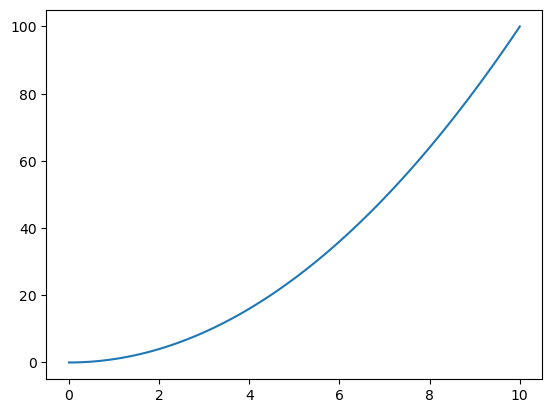

In [142]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

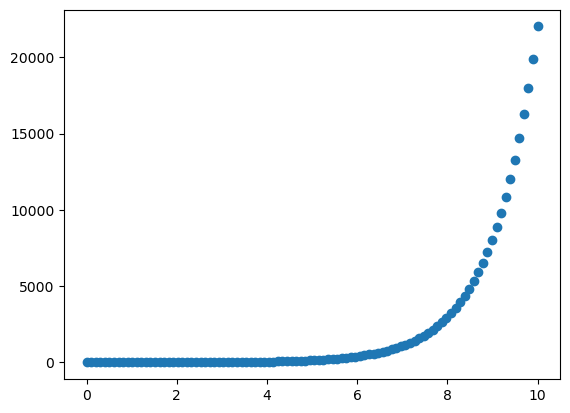

In [32]:
# Use the same data to make scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

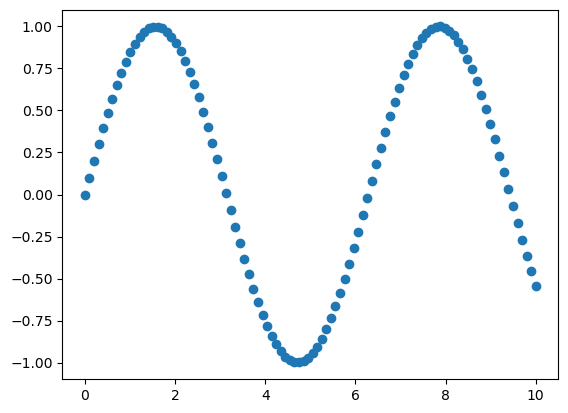

In [34]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar
* Vertical
* Horizontal

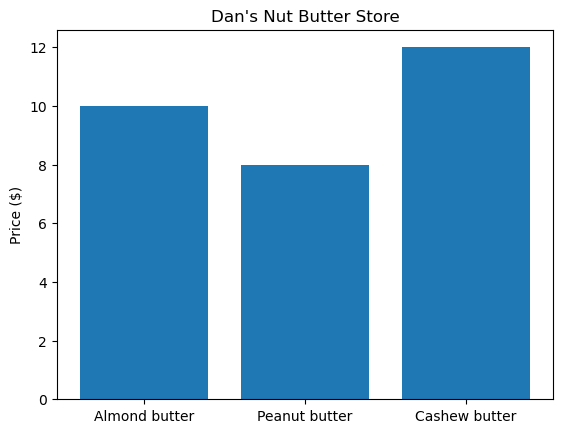

In [59]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10, 
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)");

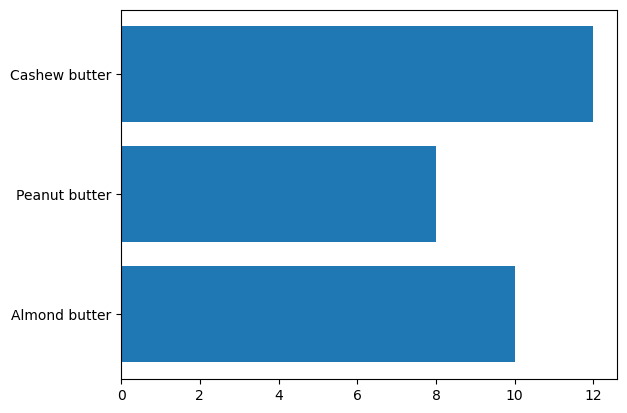

In [40]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram

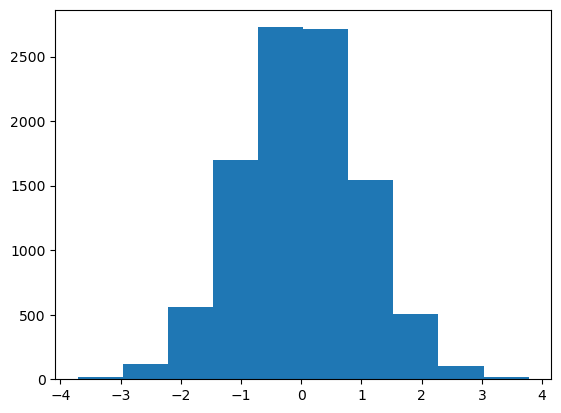

In [56]:
# Make some data
x = np.random.randn(10000)

#Make a histogram
fig,ax = plt.subplots()
ax.hist(x);

### Subplots
* Multiple plots on one figure

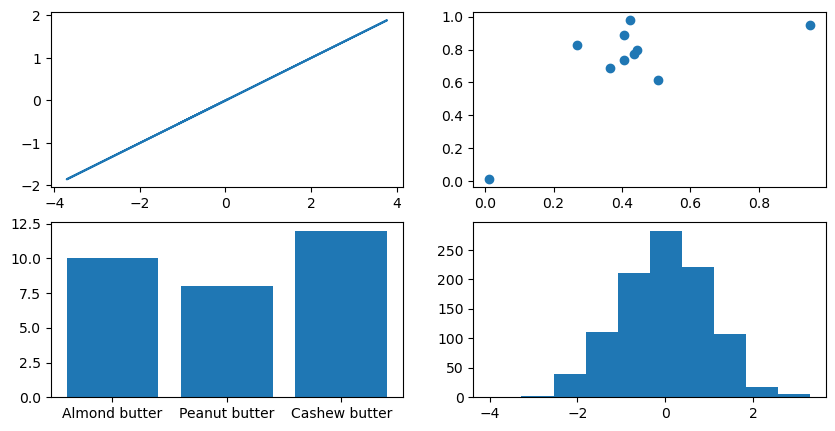

In [63]:
# Option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
ncols=2,
figsize=(10,5))

# Plot to each different axis
ax1.plot (x, x/2);
ax2.scatter (np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

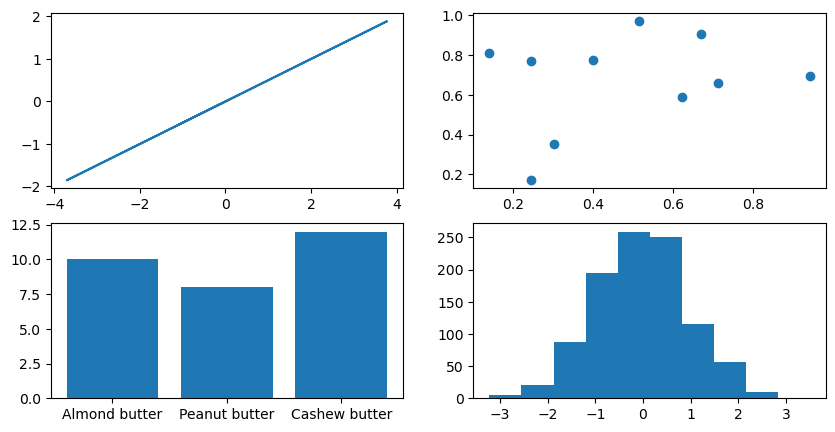

In [68]:
# Option 2
fig, ax = plt.subplots(nrows=2,
ncols=2,
figsize=(10,5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));


## Plotting from Pandas DataFrames

In [69]:
import pandas as pd

In [101]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


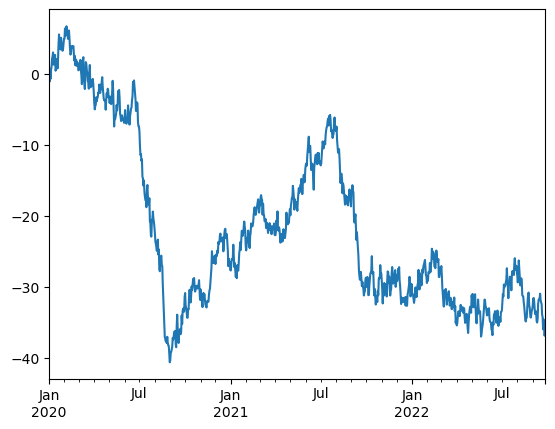

In [102]:
ts = pd.Series(np.random.randn(1000),
index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [103]:
# Re-format Price $ object to int
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\matte\AppData\Local\Temp\ipykernel_8372\2276578600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [104]:
# Remove last 2 zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [106]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [108]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


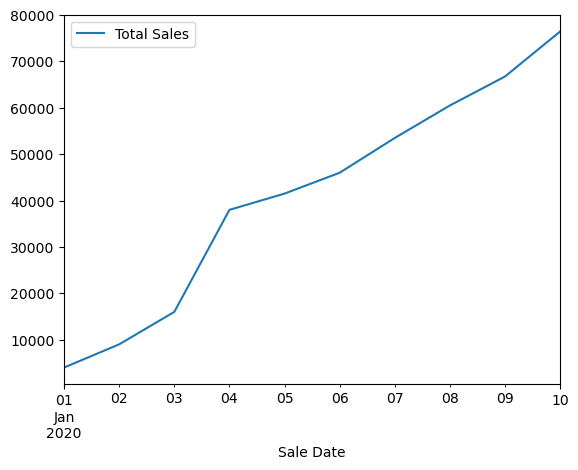

In [109]:
# Plot the Total Sales
car_sales.plot(x="Sale Date", y="Total Sales");

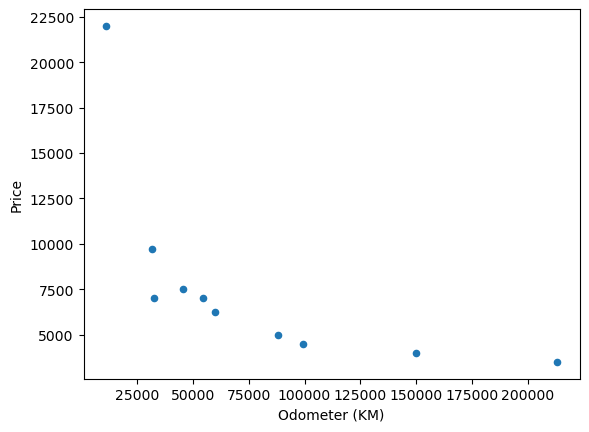

In [111]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [112]:
# Bar Graph
x = np.random.rand(10, 4)
x

# Turn into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.265611,0.386573,0.005911,0.864215
1,0.627923,0.935596,0.256007,0.566908
2,0.236482,0.823018,0.860687,0.419899
3,0.332646,0.573808,0.623873,0.257366
4,0.259475,0.789179,0.180494,0.117870
5,0.540590,0.805229,0.298023,0.115696
6,0.445277,0.680383,0.058444,0.895135
7,0.941838,0.628337,0.227137,0.938715
8,0.373270,0.308485,0.379607,0.348867
9,0.137989,0.792877,0.390780,0.406319


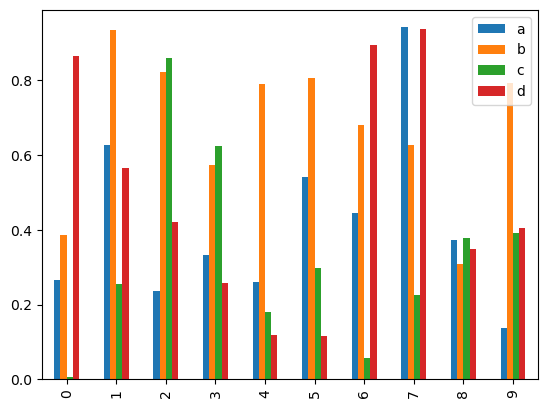

In [114]:
df.plot.bar();

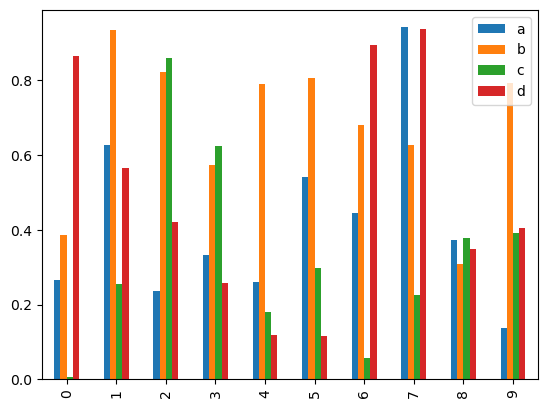

In [116]:
df.plot(kind="bar");

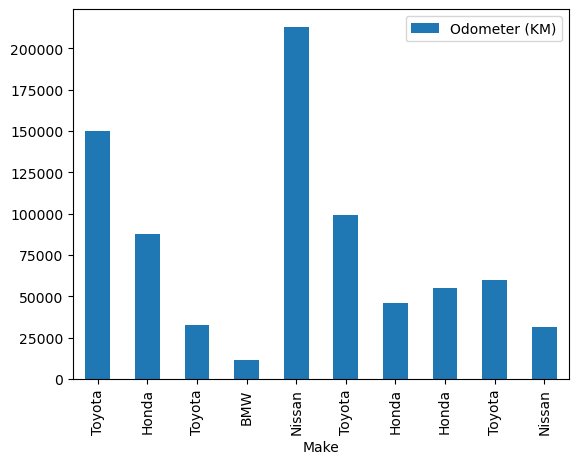

In [118]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

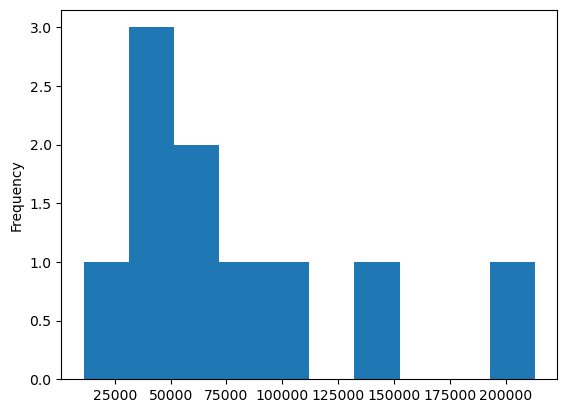

In [122]:
# Histograms

car_sales["Odometer (KM)"].plot.hist(bins=10);

In [128]:
# Let's try another dataset
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


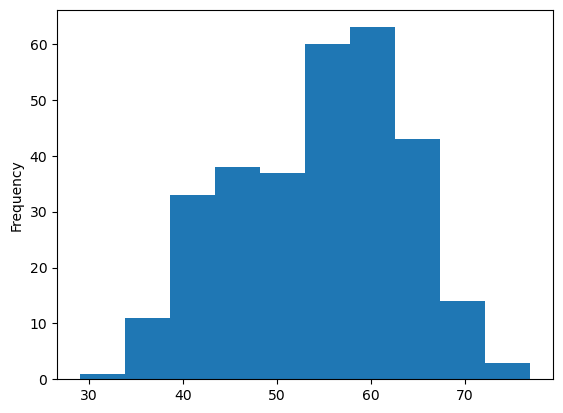

In [129]:
# Create a histogram of age
heart_disease["age"].plot.hist();

In [137]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


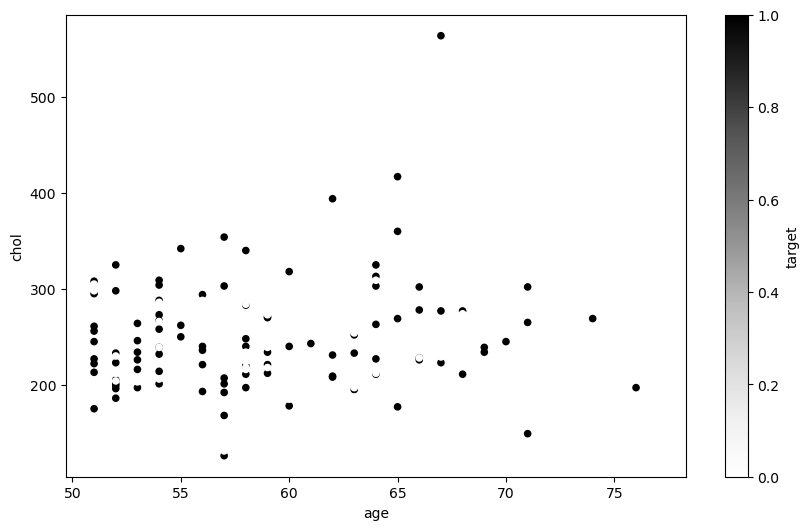

In [149]:
# Pyplot method
over_50.plot(kind="scatter",
x='age',
y='chol',
c='target',
figsize=(10,6));

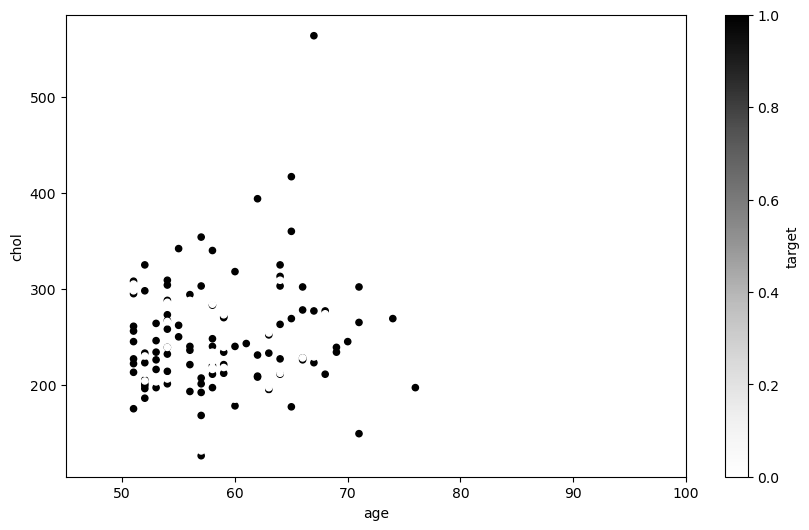

In [153]:
# OO method mixed with Pyplot
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter", x='age', y='chol', c='target', ax=ax);
# set limit for axis
# ax.set_xlim([45, 100]);

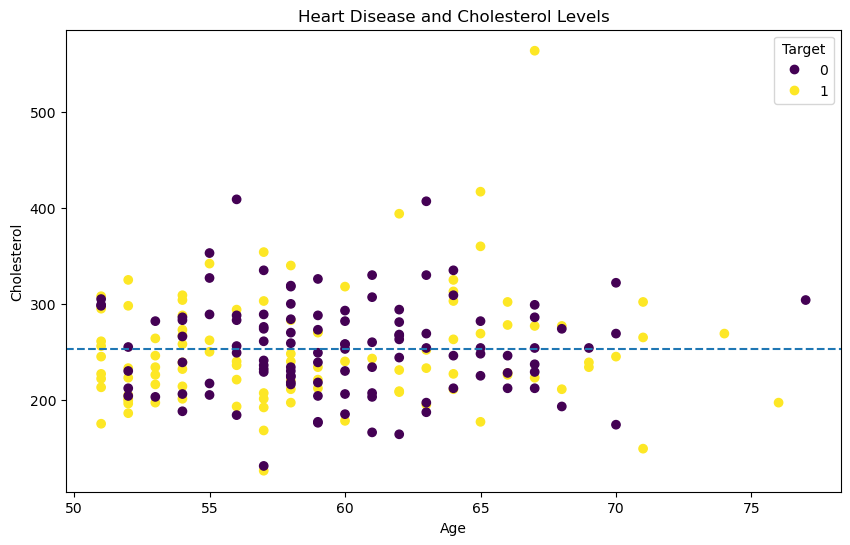

In [165]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels", xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add average line
ax.axhline(over_50['chol'].mean(), linestyle="--");

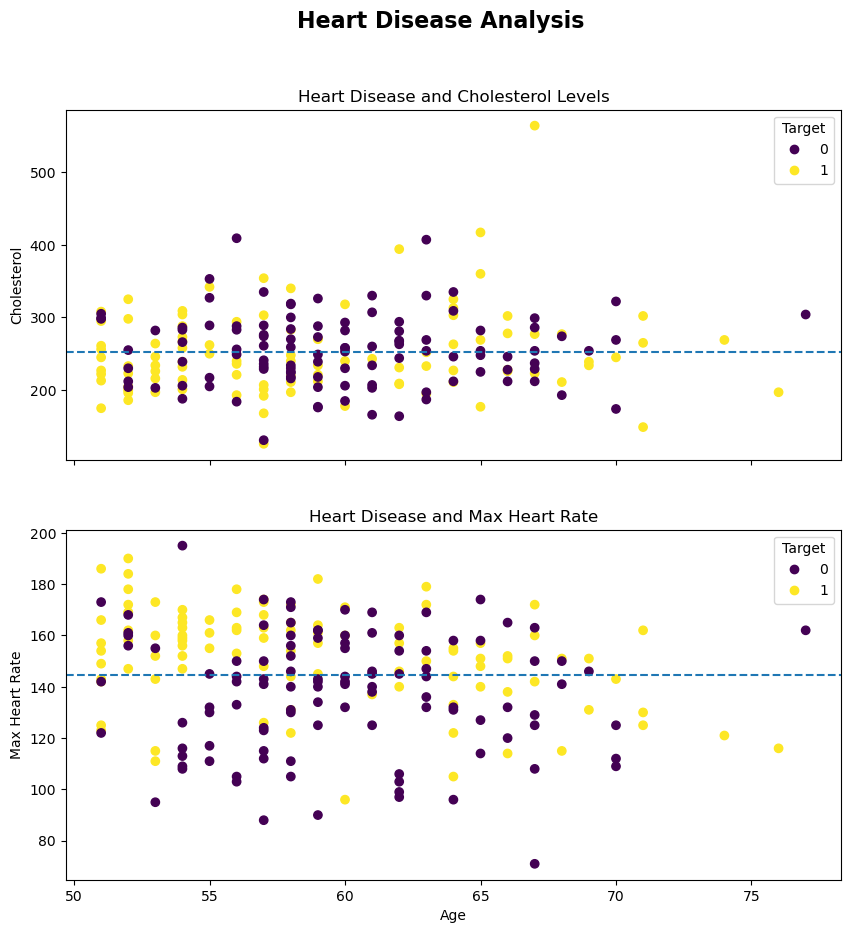

In [206]:
# Subplot of chol, age, thalac

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

#Customize ax0

ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(), linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"])

#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")


# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--");

# Add title to figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots

In [183]:
# See the diffferent styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

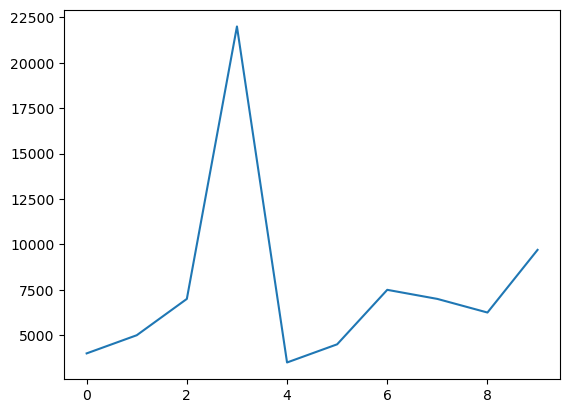

In [185]:
car_sales["Price"].plot();

In [207]:
plt.style.use('ggplot')

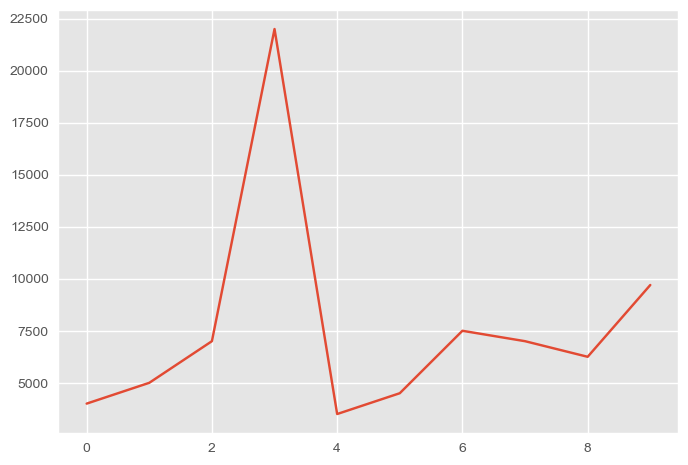

In [191]:
car_sales["Price"].plot();

In [192]:
# Create some data
x =np.random.randn(10,4)
x

array([[ 0.19133915, -1.27860514, -1.80920163,  0.30938231],
       [-0.89781392, -0.15141729, -0.63381184, -1.1895019 ],
       [-1.19087509, -0.14199847,  0.11187026, -0.92379417],
       [ 0.34286265,  0.07669427, -0.87287261, -1.45719508],
       [-1.61211115, -0.74000924,  0.01575655, -0.98554908],
       [ 1.37095613, -0.2428438 , -1.07215329,  0.5160729 ],
       [-0.78411328,  0.37812105, -0.11603176, -0.02916579],
       [-0.76601525, -0.10736471, -1.64871143, -1.51527662],
       [ 0.62459493, -0.04330802,  1.50237073, -1.05228272],
       [ 0.19342244, -0.87273015, -1.59587897,  1.09233108]])

In [194]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.191339,-1.278605,-1.809202,0.309382
1,-0.897814,-0.151417,-0.633812,-1.189502
2,-1.190875,-0.141998,0.111870,-0.923794
3,0.342863,0.076694,-0.872873,-1.457195
4,-1.612111,-0.740009,0.015757,-0.985549
5,1.370956,-0.242844,-1.072153,0.516073
6,-0.784113,0.378121,-0.116032,-0.029166
7,-0.766015,-0.107365,-1.648711,-1.515277
8,0.624595,-0.043308,1.502371,-1.052283
9,0.193422,-0.872730,-1.595879,1.092331


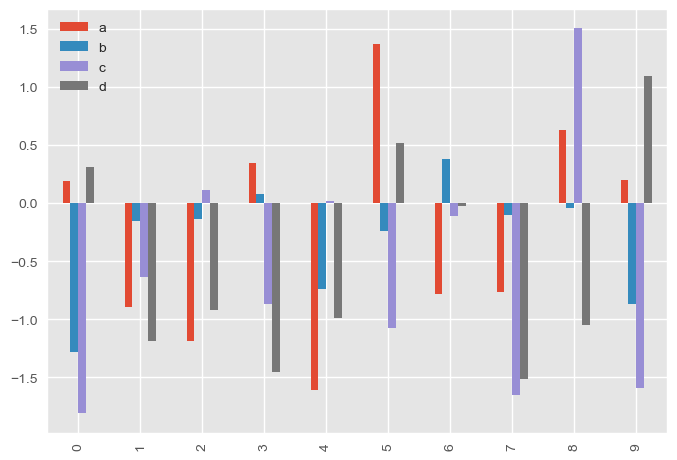

In [197]:
ax =df.plot(kind="bar");

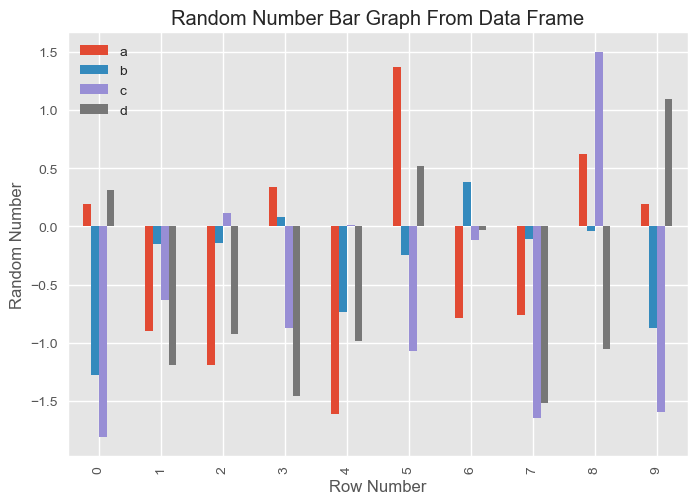

In [201]:
# Customize our plot with the set() method
ax = df.plot(kind="bar");
# Add some labels and a title
ax.set(title="Random Number Bar Graph From Data Frame", xlabel="Row Number", ylabel="Random Number");

# Make Legend visible
ax.legend().set_visible(True)

C:\Users\matte\AppData\Local\Temp\ipykernel_8372\4026528589.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid');


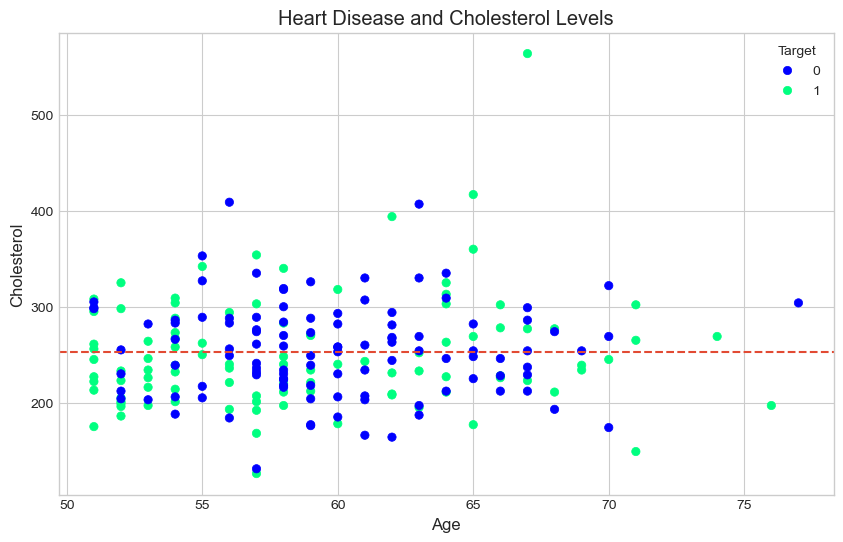

In [217]:
plt.style.use('seaborn-whitegrid');

## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter") # this changes the colour scheme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels", xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add average line
ax.axhline(over_50['chol'].mean(), linestyle="--");

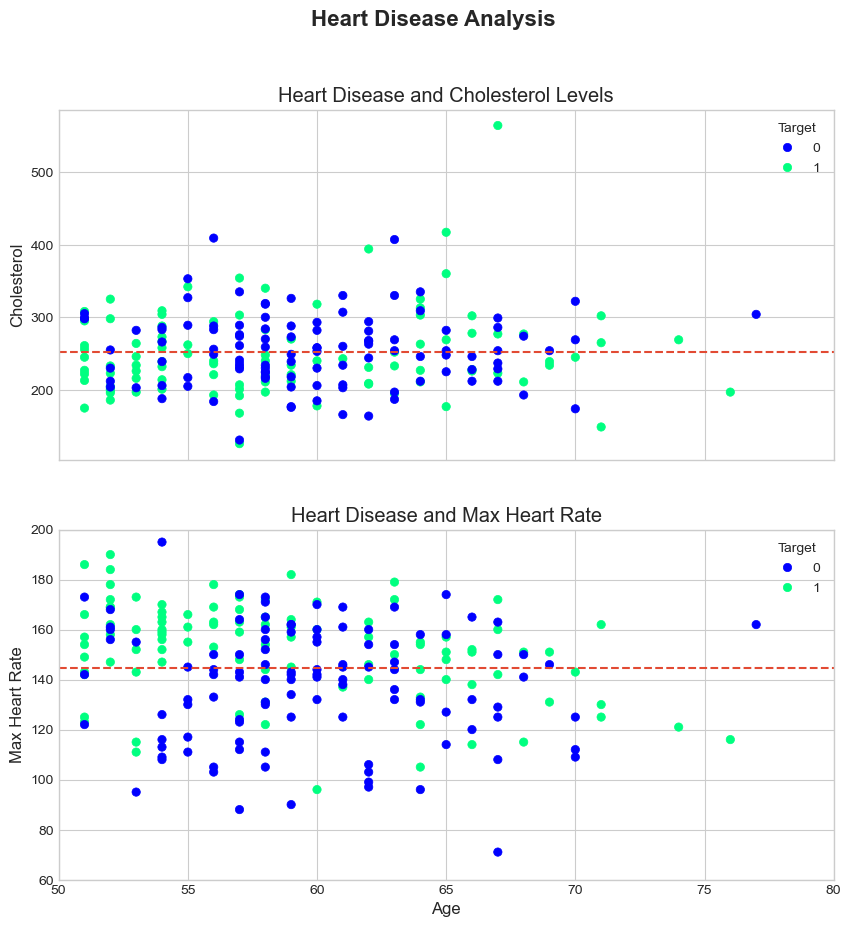

In [224]:
# Customizing the y and x axis limitations

# Subplot of chol, age, thalac

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

#Customize ax0

ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol")
# Change the x axis limits
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(), linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="winter")

#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate")

# Change the x and y axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")


# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--");

# Add title to figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Saving and Sharing Plots

In [225]:
fig.savefig("heart-disease-analysis-plot.png")